In [1]:
import osmnx as ox
import matplotlib.pyplot as plt


In [12]:
address = "Rue Defacqz, Brussels, Belgium"
location_point = ox.geocode(address)
print("Coordinates:", location_point) 

distance = 1000  # meters

Coordinates: (50.8279199, 4.3594717)


In [18]:
# network_type {“all”, “all_public”, “bike”, “drive”, “drive_service”, “walk”}
# dist -> bounding box of size 2*dist around the point (a square)
G = ox.graph_from_point(location_point, dist=distance, network_type='drive')

In [19]:
# Project the graph
graph_proj = ox.project_graph(G)



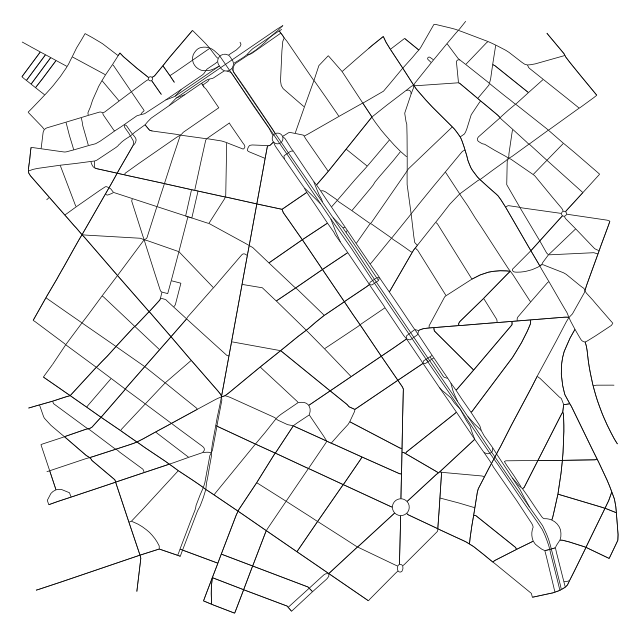

In [24]:
# Plot with a Google Maps–style look
fig, ax = ox.plot_graph(
    graph_proj,
    bgcolor='white',
    node_size=0,
    edge_color='black',
    edge_linewidth=0.5,
    show=False,
    close=False
)

plt.show()